# Joint Gaussian Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

In [2]:
# loading dataset
data = pd.read_csv(r'C:\Namra\IBA\Machine Learning-2\Assignments\formula1.csv')

In [3]:
data

,Unnamed: 0,name,country,team,races,years_in_f1,championships,gp_wins,podiums,poles,dnfs,fav_circuit,avg_yearly_salary
0,0,Frank Daniels,United States,Mercedes,67,4,5,56,29,62,16,Albert Park,16
1,1,Pierangelo Franceschi,Italy,Aston Martin,218,10,3,75,43,55,9,Circuit Zandvoort,17
2,2,Frederick Gamble,United States,Ferrari,167,8,3,56,52,72,11,Imola,14
3,3,Tristan Rousseau-Grondin,France,AlphaTauri,251,12,4,68,37,70,16,Circuit of The Americas,14
4,4,Horacio Alemany,Spain,Aston Martin,185,9,1,73,37,66,11,Jeddah Corniche Circuit,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745,Ottone Cuda,Italy,AlphaTauri,193,9,1,84,24,63,15,Red Bull Ring,10
746,746,Leonard Murphy-Wells,Great Britain,Ferrari,133,7,5,70,56,76,12,Suzuka Circuit,16
747,747,Veerle Vos,Netherlands,Ferrari,206,10,2,60,29,58,9,Hungaroring,11
748,748,Pamela White,Great Britain,Haas,166,8,5,52,38,69,13,Circuit Zandvoort,11


### Taking only continuous columns

In [4]:
# dropping categorical and unnamed column
data = data[['races','years_in_f1','championships','gp_wins','podiums','poles','dnfs','avg_yearly_salary']]
data

,races,years_in_f1,championships,gp_wins,podiums,poles,dnfs,avg_yearly_salary
0,67,4,5,56,29,62,16,16
1,218,10,3,75,43,55,9,17
2,167,8,3,56,52,72,11,14
3,251,12,4,68,37,70,16,14
4,185,9,1,73,37,66,11,14
...,...,...,...,...,...,...,...,...
745,193,9,1,84,24,63,15,10
746,133,7,5,70,56,76,12,16
747,206,10,2,60,29,58,9,11
748,166,8,5,52,38,69,13,11


## Understandind Data

In [5]:
# About Data
print('my dataset shape:', data.shape)
data.info()

my dataset shape: (750, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   races              750 non-null    int64
 1   years_in_f1        750 non-null    int64
 2   championships      750 non-null    int64
 3   gp_wins            750 non-null    int64
 4   podiums            750 non-null    int64
 5   poles              750 non-null    int64
 6   dnfs               750 non-null    int64
 7   avg_yearly_salary  750 non-null    int64
dtypes: int64(8)
memory usage: 47.0 KB


In [6]:
data.describe()

,races,years_in_f1,championships,gp_wins,podiums,poles,dnfs,avg_yearly_salary
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,161.058667,7.805333,3.777333,65.178667,41.150667,66.098667,12.334667,14.160000
std,44.513742,2.043446,1.252935,11.728576,13.314616,11.589248,2.554349,2.179771
min,20.000000,1.000000,0.000000,30.000000,0.000000,30.000000,5.000000,5.000000
25%,133.000000,7.000000,3.000000,57.000000,32.000000,58.000000,11.000000,13.000000
50%,161.000000,8.000000,4.000000,66.000000,42.000000,66.000000,12.000000,14.000000
75%,190.750000,9.000000,5.000000,73.000000,50.000000,74.000000,14.000000,16.000000
max,300.000000,14.000000,8.000000,100.000000,90.000000,100.000000,20.000000,20.000000


### Data Preparation for running regression

In [10]:
# running regression on data

# target split
X = data.drop(['avg_yearly_salary'], axis=1)
y = data[['avg_yearly_salary']]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Pipeline for regressors

In [11]:
# creating pipeline for regressors
pipeline_lr = Pipeline([('pca1', PCA(n_components=2)),
                       ('lrclassifier', LinearRegression())])
pipeline_rg = Pipeline([('pca2', PCA(n_components=2)),
                       ('rgclassifier', Ridge(alpha=0.9))])
pipeline_ls = Pipeline([('pca3', PCA(n_components=2)),
                       ('lsclassifier', Lasso(alpha=0.7))])
pipeline_el = Pipeline([('pca4', PCA(n_components=2)),
                       ('elclassifier', ElasticNet(alpha=0.8, l1_ratio=0.5))])

In [12]:
pipelines = [pipeline_lr, pipeline_rg, pipeline_ls, pipeline_el]
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

### Regression on dataset with continuous columns only 

In [13]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Ridge Regression', 2: 'Lasso Regression', 3: 'Elastic Net Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i,model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[i], model.score(X_test, y_test)))

Linear Regression Test Accuracy: 0.11404626535031914
Ridge Regression Test Accuracy: 0.11404637375978466
Lasso Regression Test Accuracy: 0.11486775523145476
Elastic Net Regression Test Accuracy: 0.11470748173767498


In [14]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy = model.score(X_test,y_test)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: Lasso Regression


## Plotting histplots of numerical cols and noting skewness

races
0.05733713918460377


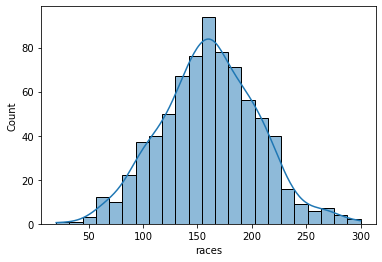

years_in_f1
0.024431514542253924


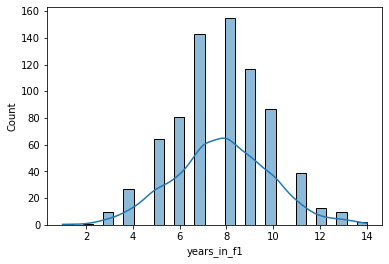

championships
-0.11633717141440936


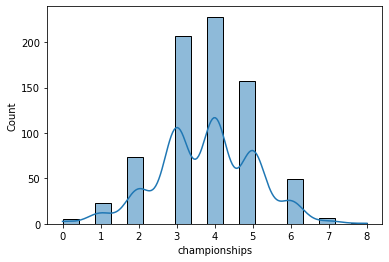

gp_wins
-0.0763087413643364


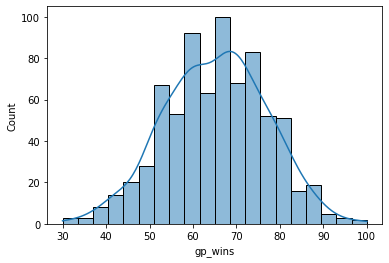

podiums
-0.0021921558607554607


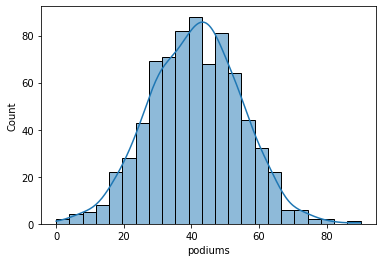

poles
-0.04570301585984446


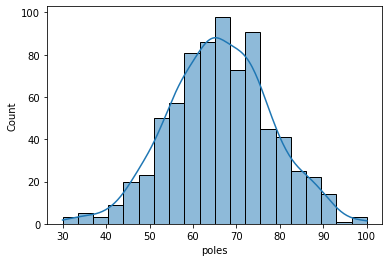

dnfs
-0.022898939830373673


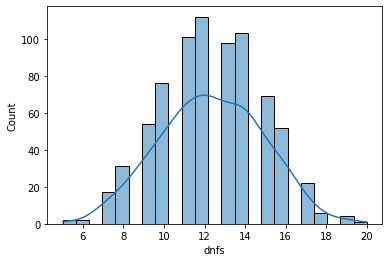

avg_yearly_salary
-0.24087316864620195


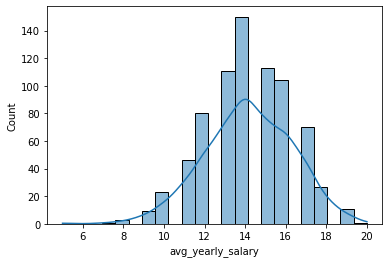

In [15]:
# plotting a histogram
for col in data:
    print(col)
    print(skew(data[col]))

    ax = sns.histplot(data[col], kde=True)
    plt.show()

### Above output shows columns with skewness values. 
####   1. races, years_in_f1, gp_wins, podiums, poles, dnfs, have very low skewness. 
####   2. This means we can assume them to be following gaussian distribution.
####   3. Target variable also has very low skewness. 
####   4. We will further look at shapiro-wilk test to check if these columns are normally distributed.

### Columns having pval>0.05 are normally distributed in shapiro test

In [16]:
# shapiro-wilk test
for col in data:
    print(col, ':', str(shapiro(data[col])))

races : ShapiroResult(statistic=0.9982183575630188, pvalue=0.638690710067749)
years_in_f1 : ShapiroResult(statistic=0.9785652756690979, pvalue=4.974123335443892e-09)
championships : ShapiroResult(statistic=0.9449057579040527, pvalue=4.4349504270734333e-16)
gp_wins : ShapiroResult(statistic=0.9975486397743225, pvalue=0.3351175785064697)
podiums : ShapiroResult(statistic=0.9985681772232056, pvalue=0.8132235407829285)
poles : ShapiroResult(statistic=0.9977558851242065, pvalue=0.4169639050960541)
dnfs : ShapiroResult(statistic=0.984850287437439, pvalue=5.238597964307701e-07)
avg_yearly_salary : ShapiroResult(statistic=0.9779317378997803, pvalue=3.2592388787833215e-09)


## Normally distributed columns considered as gdata
#### gdata columns are noted down because they are normally distributed as per shapiro test

In [17]:
# taking columns that follow gaussian distribution only and target
gdata = data[['races','gp_wins','podiums','poles','avg_yearly_salary']]

In [18]:
# separating target from data
X1 = gdata.drop(['avg_yearly_salary'], axis=1)
y1 = gdata[['avg_yearly_salary']]

In [19]:
# train_test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

### Regression on normally distributed columns

In [20]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Ridge Regression', 2: 'Lasso Regression', 3: 'Elastic Net Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X1_train, y1_train)

for i,model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[i], model.score(X1_test, y1_test)))

Linear Regression Test Accuracy: 0.06245414418000439
Ridge Regression Test Accuracy: 0.06245408940192332
Lasso Regression Test Accuracy: 0.061489628077834424
Elastic Net Regression Test Accuracy: 0.062014702092689


In [21]:
for i,model in enumerate(pipelines):
    if model.score(X1_test,y1_test)>best_accuracy:
        best_accuracy = model.score(X1_test,y1_test)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: Lasso Regression


## Preparation for generating a sample from above noramlly distributed gdata
#### Converting dataframe without target into an array to calculate mean and covariance

In [24]:
# converting dataset into numpy array for mean and cov calculation and fitting joing gaussian curve
df_numpy = X1.to_numpy()
df_numpy.shape
x_data=df_numpy
y_data=y.to_numpy()

In [25]:
# calculating mean and covariance of numerical dataset to generate another distribution
mean = np.mean(df_numpy, axis=0)
cov = np.cov(df_numpy, rowvar=False)
mean.shape, cov.shape

((4,), (4, 4))

#### mean is a 4x1 vector and covariance is a 4x4 matrix as there are 4 attributes

In [27]:
print(mean)
print(cov)

[161.05866667  65.17866667  41.15066667  66.09866667]
[[ 1.98147319e+03 -1.26379991e+01 -3.86016413e+01 -8.79751847e+00]
 [-1.26379991e+01  1.37559491e+02 -1.45018603e+00 -7.06438095e+00]
 [-3.86016413e+01 -1.45018603e+00  1.77279005e+02 -2.12837027e+00]
 [-8.79751847e+00 -7.06438095e+00 -2.12837027e+00  1.34310679e+02]]


### Taking mean and covariance of gaussian distribution data, generating another dataset that resembles our current dataset

In [28]:
# generating another sample from calculated mean and covariance
data2 = np.random.multivariate_normal(mean, cov, size=750)
data2

array([[145.36648261,  50.83065068,  27.28789093,  56.7137343 ],
       [168.46251009,  48.50464853,  67.34723358,  56.61468966],
       [109.47418447,  71.71329901,  37.57607123,  60.77549184],
       ...,
       [139.61236378,  37.34329278,  39.07925071,  91.94778182],
       [196.06303062,  71.24536106,  16.31218456,  74.51305998],
       [ 73.53240421,  57.28893891,  51.67112601,  54.83754312]])

### converting sample (data2) into a dataframe for running regression

In [29]:
data2 = pd.DataFrame(data2)
data2

,0,1,2,3
0,145.366483,50.830651,27.287891,56.713734
1,168.462510,48.504649,67.347234,56.614690
2,109.474184,71.713299,37.576071,60.775492
3,207.755889,55.262138,40.971404,71.381348
4,89.674624,63.717632,43.508383,68.805621
...,...,...,...,...
745,123.263730,86.840586,56.913962,68.366379
746,150.912816,86.489663,54.451208,51.195366
747,139.612364,37.343293,39.079251,91.947782
748,196.063031,71.245361,16.312185,74.513060


### Regression on sample(data2)

In [30]:
# X and target split
X2 = data2
y2 = data[['avg_yearly_salary']]

# train-test split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Ridge Regression', 2: 'Lasso Regression', 3: 'Elastic Net Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X2_train, y2_train)

for i,model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[i], model.score(X2_test, y2_test)))

Linear Regression Test Accuracy: -0.0014596548351288874
Ridge Regression Test Accuracy: -0.001459679434165917
Lasso Regression Test Accuracy: -0.004580220274946534
Elastic Net Regression Test Accuracy: -0.003518396046212402


In [31]:
for i,model in enumerate(pipelines):
    if model.score(X2_test,y2_test)>best_accuracy:
        best_accuracy = model.score(X2_test,y2_test)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: Lasso Regression


### In the dataset with all continuous columns, I am dropping the normally distributed columns and adding ones from sample data, i.e. data2

In [32]:
# dropping normally distributed cols from original and substituting cols from sample into original
data3 = data.drop(gdata.columns, axis=1)
data3['0'] = data2[0]
data3['1'] = data2[1]
data3['2'] = data2[2]
data3['3'] = data2[3]
data3['target'] = data['avg_yearly_salary']

In [33]:
data3

,years_in_f1,championships,dnfs,0,1,2,3,target
0,4,5,16,145.366483,50.830651,27.287891,56.713734,16
1,10,3,9,168.462510,48.504649,67.347234,56.614690,17
2,8,3,11,109.474184,71.713299,37.576071,60.775492,14
3,12,4,16,207.755889,55.262138,40.971404,71.381348,14
4,9,1,11,89.674624,63.717632,43.508383,68.805621,14
...,...,...,...,...,...,...,...,...
745,9,1,15,123.263730,86.840586,56.913962,68.366379,10
746,7,5,12,150.912816,86.489663,54.451208,51.195366,16
747,10,2,9,139.612364,37.343293,39.079251,91.947782,11
748,8,5,13,196.063031,71.245361,16.312185,74.513060,11


### Regression on this new dataset

In [34]:
# X and target split
X3 = data3
y3 = data3[['target']]

# train-test split 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Linear Regression', 1: 'Ridge Regression', 2: 'Lasso Regression', 3: 'Elastic Net Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X3_train, y3_train)

for i,model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[i], model.score(X3_test, y3_test)))

Linear Regression Test Accuracy: -0.004839481633327258
Ridge Regression Test Accuracy: -0.004839405569240007
Lasso Regression Test Accuracy: -0.0033643119970290236
Elastic Net Regression Test Accuracy: -0.003836732801181686


In [35]:
for i,model in enumerate(pipelines):
    if model.score(X3_test,y3_test)>best_accuracy:
        best_accuracy = model.score(X3_test,y3_test)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy: Lasso Regression
